~~~sql
-- WordCloud - negative and positive sentiment:

WITH
FIND_EVENT AS 
(   	SELECT title AS word
       	 FROM event, date, description
WHERE fullDate = "28/07/2017" AND felling = 1 AND event.dateID = date.dataID AND event.descriptionID = description.descriptionID
),
COUNT_WORDS AS 
(	SELECT egexp_split_to_table (word, ‘ ‘) AS word_tokenized, COUNT(*) AS number
FROM FIND_EVENT
GROUP BY word_tokenized
),
SELECT word_tokenized, number   // visualização 1
FROM COUNT_WORDS
VISUALIZE AS wordcloud
SELECT word_tokenized, number  // visualização 2
FROM COUNT_WORDS
VISUALIZE AS vbar (word_tokenized, number)
~~~sql

### Negative

In [242]:
import pandas as pd

# DataFrames
event = pd.read_csv("./data/event.csv")
location = pd.read_csv("./data/location.csv",index_col="locationID")
date = pd.read_csv("./data/date.csv",index_col="dateID")
content = pd.read_csv("./data/content.csv",index_col="contentID")

# Only negative events (WHERE)

event_negative = event[event['NumberNegativeNews']==1]

# Joining tables (WHERE/JOIN)

event_joined = event_negative.join(content, on="contentID").join(date,on="dateID")

# Filtering by date (WHERE)

find_event = event_joined[event_joined['fullDate']=='2017-07-28']['title']

# Splitting words (regexp function)
title_split = find_event.apply(lambda x: x.split(" "))
title_split = title_split.explode("title")

# Grouping words (groupby)
count_words = title_split.groupby(title_split).count()
count_words = count_words.to_frame(name="number").reset_index()
count_words = count_words.rename(columns={"title":"word"})
count_words.head()

,word,number
0,'Skinny',1
1,'The,1
2,'Welcome,1
3,3,1
4,A,3


In [243]:
find_event = event_joined[event_joined['fullDate']=='2017-07-28']['title'].tolist()
find_event[6]

"3 GOP Senators Didn't Save Obamacare. You Did."

In [244]:
find_event = event_joined[event_joined['fullDate']=='2017-07-28']['summary'].tolist()
find_event[5]

'And here are the three Republican senators who made that possible.'

In [245]:
find_event = event_joined[event_joined['fullDate']=='2017-07-28']['linkSource'].tolist()
find_event[6]

'https://www.huffingtonpost.com/entry/three-gop-senators-didnt-save-obamacare-you-did_us_597b8020e4b06b305561d05f'

'Skinny' 'The 'Welcome 3 A About Allowed America Americans And As Awful Back Be Became Bill Bomb Bring Brzezinski Cable Can Cancer Care Care, Castile Castro's Change Circumstances Collusion Conundrum: Crisis Cuba Dean Defends Did Did. Didn't Do' Donald Donald, Down Down. Email: Evangelicalism Everything Exxon Failed Fails Failure Few Fifties Finding Focuses Follow Football For Friday' Friday's Fund GOP GOP's GOP-Controlled Get Goldmanization Government Government. Have Head-Spinning. Health Hell Heller Here's Here? Horse How Illegal? In Is Isn’t It's Its John Let Lose McCain McCain's Mika Millions Mobil Model Mooch, Morning Mouth Named News Not Now Obamacare Obamacare. Of On Pale Pans Particularly Person's Pestilence Philando Police Political Post-Communist Qatar Read Repeal Republicans Right Russia Savagery. Save Says Scaramucci Scaramucci's Senate Senate's Senators Serve Set Shouldn't Single-Payer Surprising Text That The Theology Thing Think Thinking? This Time To Training Transgend

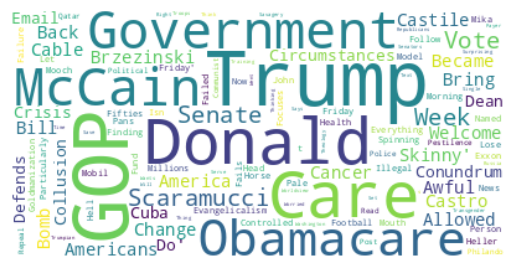

In [246]:
# Visualizing as WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
word_strings = " ".join(count_words.word.to_list())
print(word_strings)
wordcloud = WordCloud(background_color="white").generate(word_strings)
wordcloud.words_

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


([<matplotlib.axis.XTick at 0x79a5e540e0d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

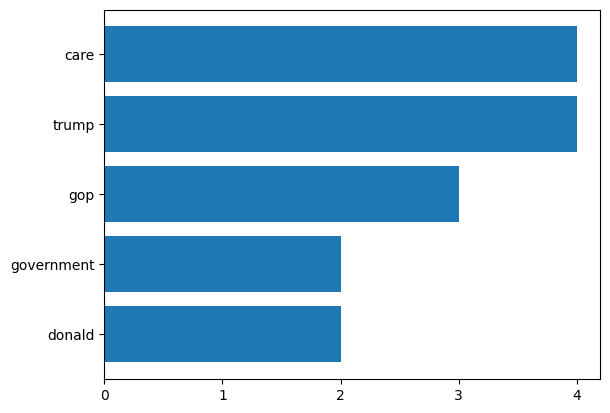

In [247]:
# Visualizing as VBar
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# We will need to remove stopwords (The, To, Of)

def clean_words(word):
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("'s","")
    word = word.replace("'s","")
    
    return word.lower()

count_words['word'] = count_words['word'].apply(lambda x: clean_words(x))
listOfWords = " ".join(count_words['word'].tolist())

dictWords = {}
for x in range(5):
    wordclouddict = list(wordcloud.words_.keys())
    word = wordclouddict[x].lower()
    dictWords[word] = listOfWords.count(word)

# Sort based on reverse of Values
orderedDictWord = {k: v for k, v in sorted(dictWords.items(), key=lambda item: item[1], reverse=False)}

count_words_without_stopwords = count_words[~count_words['word'].isin(STOPWORDS)]

plt.barh(orderedDictWord.keys(),orderedDictWord.values())
plt.xticks(range(0, int(max(orderedDictWord.values())) + 1, 1))


### Positive

In [248]:
import pandas as pd

# DataFrames
event = pd.read_csv("./data/event.csv")
location = pd.read_csv("./data/location.csv",index_col="locationID")
date = pd.read_csv("./data/date.csv",index_col="dateID")
content = pd.read_csv("./data/content.csv",index_col="contentID")

# Filtering events with negative sentiments only (WHERE)

event_negative = event[event['NumberPositiveNews']==1]

# Joining tables (WHERE/JOIN)

event_joined = event_negative.join(content, on="contentID").join(date,on="dateID")

# Filtering by date (WHERE)

find_event = event_joined[event_joined['fullDate']=='2017-07-28']['title']

# Splitting words (regexp function)

title_split = find_event.apply(lambda x: x.split(" "))
title_split = title_split.explode("title")

# Grouping words (groupby)

count_words = title_split.groupby(title_split).count()
count_words = count_words.to_frame(name="number").reset_index()
count_words = count_words.rename(columns={"title":"word"})
count_words.head()

,word,number
0,'Maverick',1
1,2017,1
2,2020,1
3,"28,",1
4,A,1


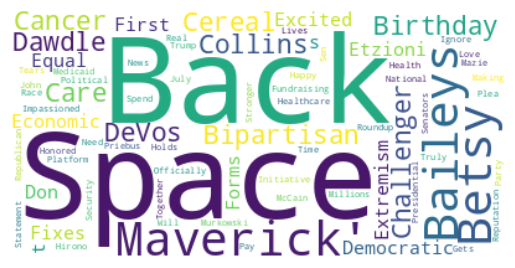

In [249]:
# Visualizing as WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
word_strings = " ".join(count_words.word.to_list())
wordcloud = WordCloud(background_color="white").generate(word_strings)
wordcloud.words_

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


([<matplotlib.axis.XTick at 0x79a5df6fa710>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

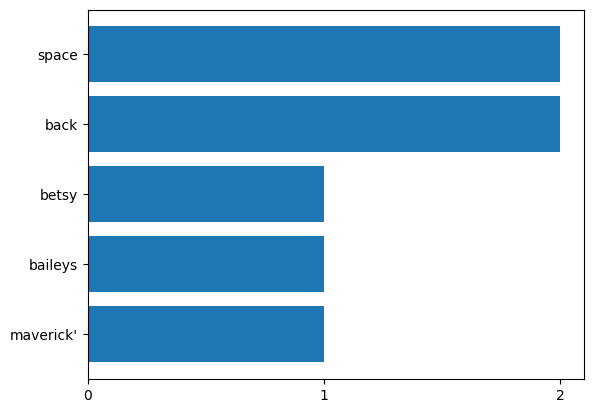

In [250]:
# Visualizing as VBar
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# We will need to remove stopwords (The, To, Of)

def clean_words(word):
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("'s","")
    word = word.replace("'s","")
    
    return word.lower()

count_words['word'] = count_words['word'].apply(lambda x: clean_words(x))
listOfWords = " ".join(count_words['word'].tolist())

dictWords = {}
for x in range(5):
    wordclouddict = list(wordcloud.words_.keys())
    word = wordclouddict[x].lower()
    dictWords[word] = listOfWords.count(word)

# Sort based on reverse of Values
orderedDictWord = {k: v for k, v in sorted(dictWords.items(), key=lambda item: item[1], reverse=False)}

count_words_without_stopwords = count_words[~count_words['word'].isin(STOPWORDS)]

plt.barh(orderedDictWord.keys(),orderedDictWord.values())
plt.xticks(range(0, int(max(orderedDictWord.values())) + 1, 1))